## Content
#### 1)Libraries
#### 2)Data extraction
#### 3)Data exploration
#### 4)Unbalanced Data and Resampling
#### 5)Feature selection
#### 6) Classification models
#### 7)Detection of the most influential variables

### Loading the libraries

In [403]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,recall_score,roc_auc_score,roc_curve,precision_score,f1_score,auc,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


### Data Extraction

In [347]:
customer_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [348]:
print(customer_data.shape)
print(test_data.shape)

(200000, 202)
(200000, 201)


In [349]:
customer_data.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [350]:
test_data.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


### Data Exploration

In [351]:
test_data.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.658737,-1.624244,10.707452,6.788214,11.076399,-5.050558,5.415164,16.529143,0.277135,7.569407,...,3.189766,7.458269,1.925944,3.322016,17.996967,-0.133657,2.290899,8.912428,15.869184,-3.246342
std,3.036716,4.040509,2.633888,2.052724,1.616456,7.869293,0.864686,3.424482,3.333375,1.231865,...,4.551239,3.025189,1.479966,3.995599,3.140652,1.429678,5.446346,0.920904,3.008717,10.398589
min,0.188700,-15.043400,2.355200,-0.022400,5.484400,-27.767000,2.216400,5.713700,-9.956000,4.243300,...,-14.093300,-2.407000,-3.340900,-11.413100,9.382800,-4.911900,-13.944200,6.169600,6.584000,-39.457800
25%,8.442975,-4.700125,8.735600,5.230500,9.891075,-11.201400,4.772600,13.933900,-2.303900,6.623800,...,-0.095000,5.166500,0.882975,0.587600,15.634775,-1.160700,-1.948600,8.260075,13.847275,-11.124000
50%,10.513800,-1.590500,10.560700,6.822350,11.099750,-4.834100,5.391600,16.422700,0.372000,7.632000,...,3.162400,7.379000,1.892600,3.428500,17.977600,-0.162000,2.403600,8.892800,15.943400,-2.725950
75%,12.739600,1.343400,12.495025,8.327600,12.253400,0.942575,6.005800,19.094550,2.930025,8.584825,...,6.336475,9.531100,2.956000,6.174200,20.391725,0.837900,6.519800,9.595900,18.045200,4.935400
max,22.323400,9.385100,18.714100,13.142000,16.037100,17.253700,8.302500,28.292800,9.665500,11.003600,...,20.359000,16.716500,8.005000,17.632600,27.947800,4.545400,15.920700,12.275800,26.538400,27.907400


This is an anonymised dataset with 199 discrete numeric variables, with a dependent variable labeled as a binary variable and a column in string format with an identifier label. Two training datasets are provided, a training dataset and evaluation dataset, but no target variable so that for our purpose we won't use it to train the models. The task that is requested in this challenge is to predict the value of the target column in the test set.

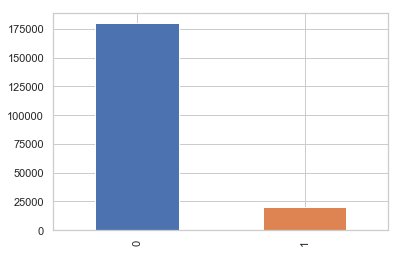

In [352]:
customer_data['target'].value_counts().plot.bar()
plt.show()

### We have imbalance data.

### Missing Value Analysis

In [353]:
print(customer_data.isnull().sum().any())
print(test_data.isnull().sum().any())

False
False


There is no missing value present

## Checking the distribution
Get an idea of this data distribution, we review in the training dataset that we will work with, we review the histogram of the mean values of each record based on the binary target variable

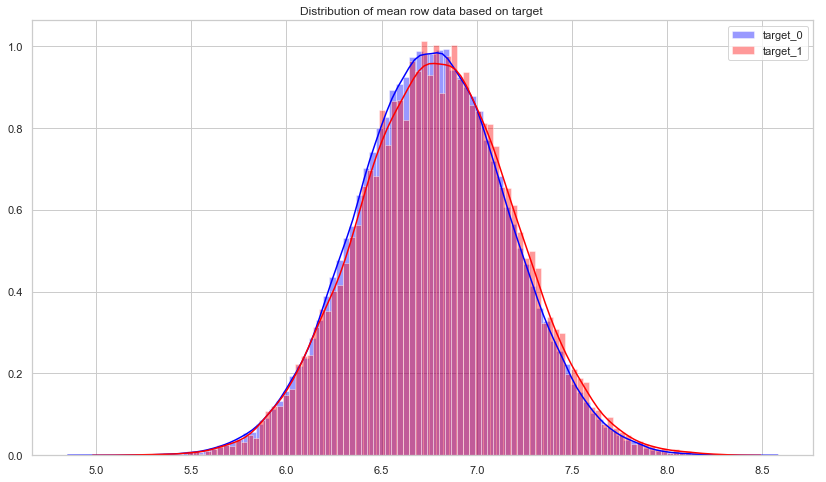

In [354]:

columns = list(customer_data.columns)
columns.remove('target')
columns.remove('ID_code')

target0_data = customer_data[customer_data['target']==0]
target1_data = customer_data[customer_data['target']==1]
plt.figure(figsize=(14,8))
plt.title("Distribution of mean row data based on target ")
sns.distplot(target0_data[columns].mean(axis=1),color='blue',kde=True,bins=100,label='target_0')
sns.distplot(target1_data[columns].mean(axis=1),color='red',kde=True,bins=100,label='target_1')
plt.legend()
plt.show()

As we can see that there is a small variation in the mean of all feature that could explain the target variable.

####  We will look for correlation variables to decrease high dimensionality. We have tried to numerically show it as visually the plot would be too large. 

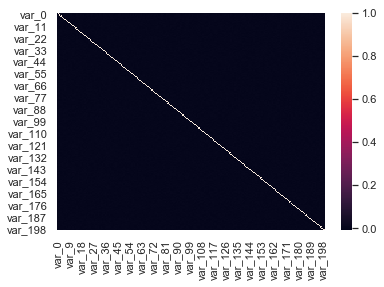

In [355]:
corr_matrix = customer_data[columns].corr()
sns.heatmap(corr_matrix)

We try to detect potential correlated variables to decrease high dimensionality. As the correlation matrix is too large visually as seen above, we tried to numerically detect the existence of correlations above 0.5 and below -0.5.

In [356]:
corr = customer_data.corr()
high_corr = np.where(corr>0.5)
high_corr = [(corr(x),corr(y)) for x,y in zip(*high_corr) if x!=y and x<y]
if len(high_corr)==0:
    print("There are no correlated variables")

There are no correlated variables


## PCA

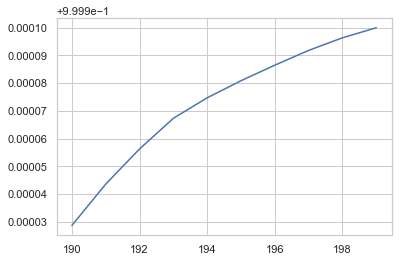

In [404]:
from sklearn.decomposition import PCA
ratio={}
for i in range(190,200):
    pca=PCA(n_components=i).fit(customer_data[columns])
    ratio[i]=sum(pca.explained_variance_ratio_)
    
pd.Series(ratio).plot()
plt.show()

#### It is observed that we require whole 200 features to explain the variance. So we will not be applying PCA here.

## Outlier

In [357]:
def boxplot_func(data_frame,col):
    sns.set(style="whitegrid")
    plt.title("Outliers")
    fig, ax = plt.subplots(10,10,figsize=(18,24))
    counter=0
    for c in col:
        counter+=1
        plt.subplot(10,10,counter)
        sns.boxplot(data_frame[c])
        plt.xlabel(c)
        plt.tick_params(axis='x', labelsize=7, pad= -7)
    plt.show()

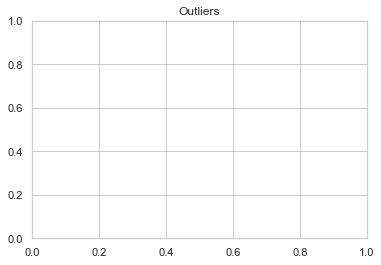

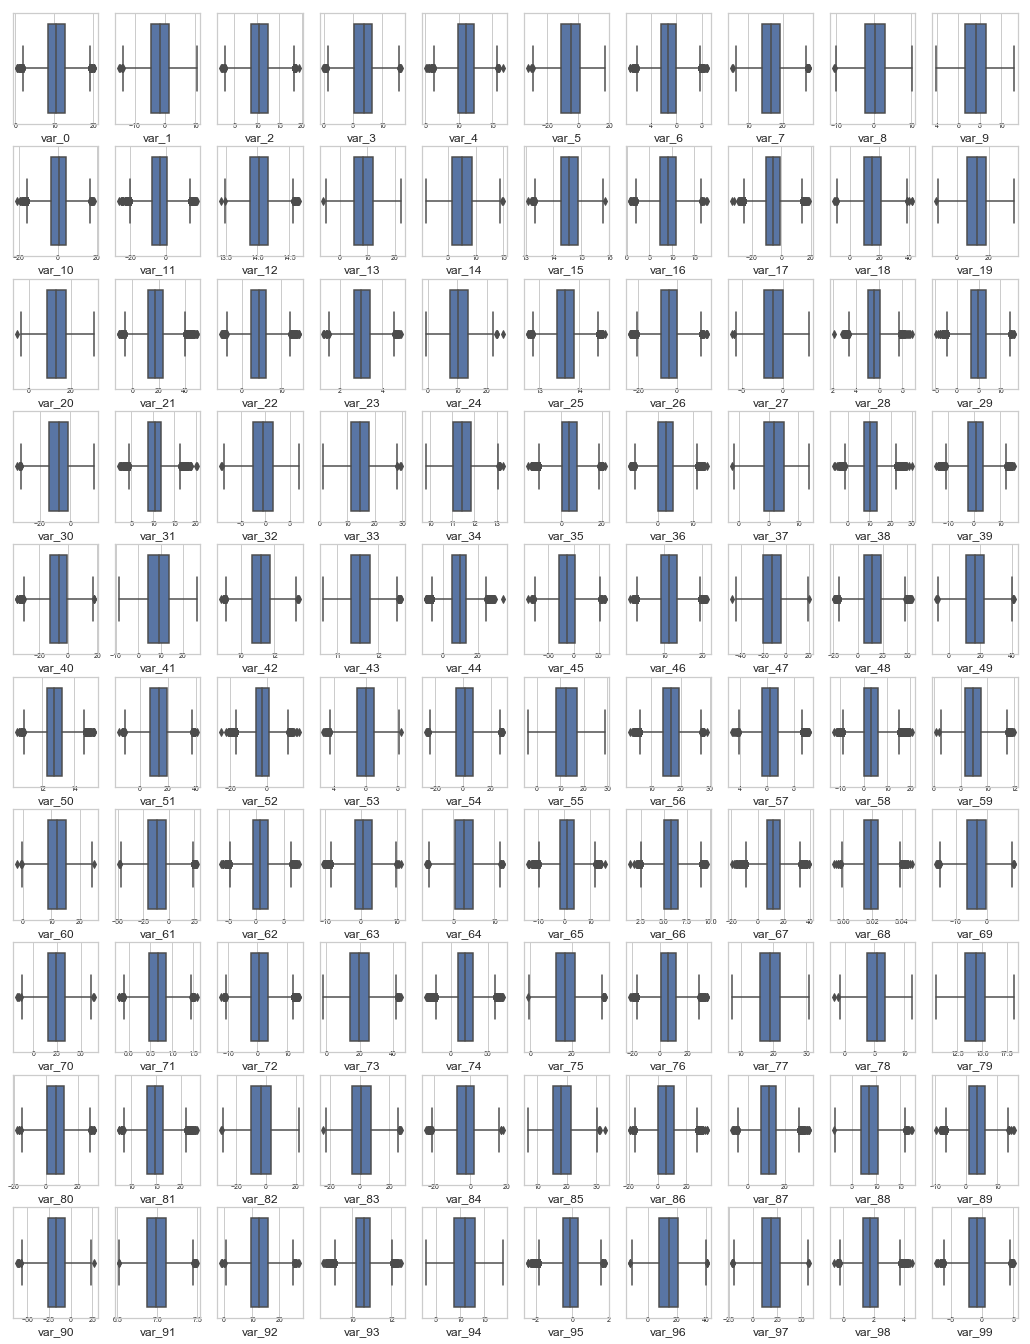

In [358]:
col = customer_data.columns.values[2:102]
boxplot_func(customer_data,col)

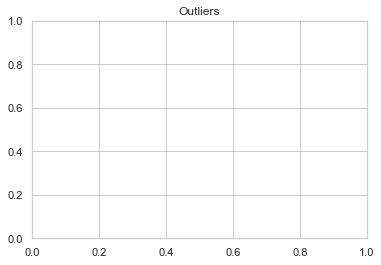

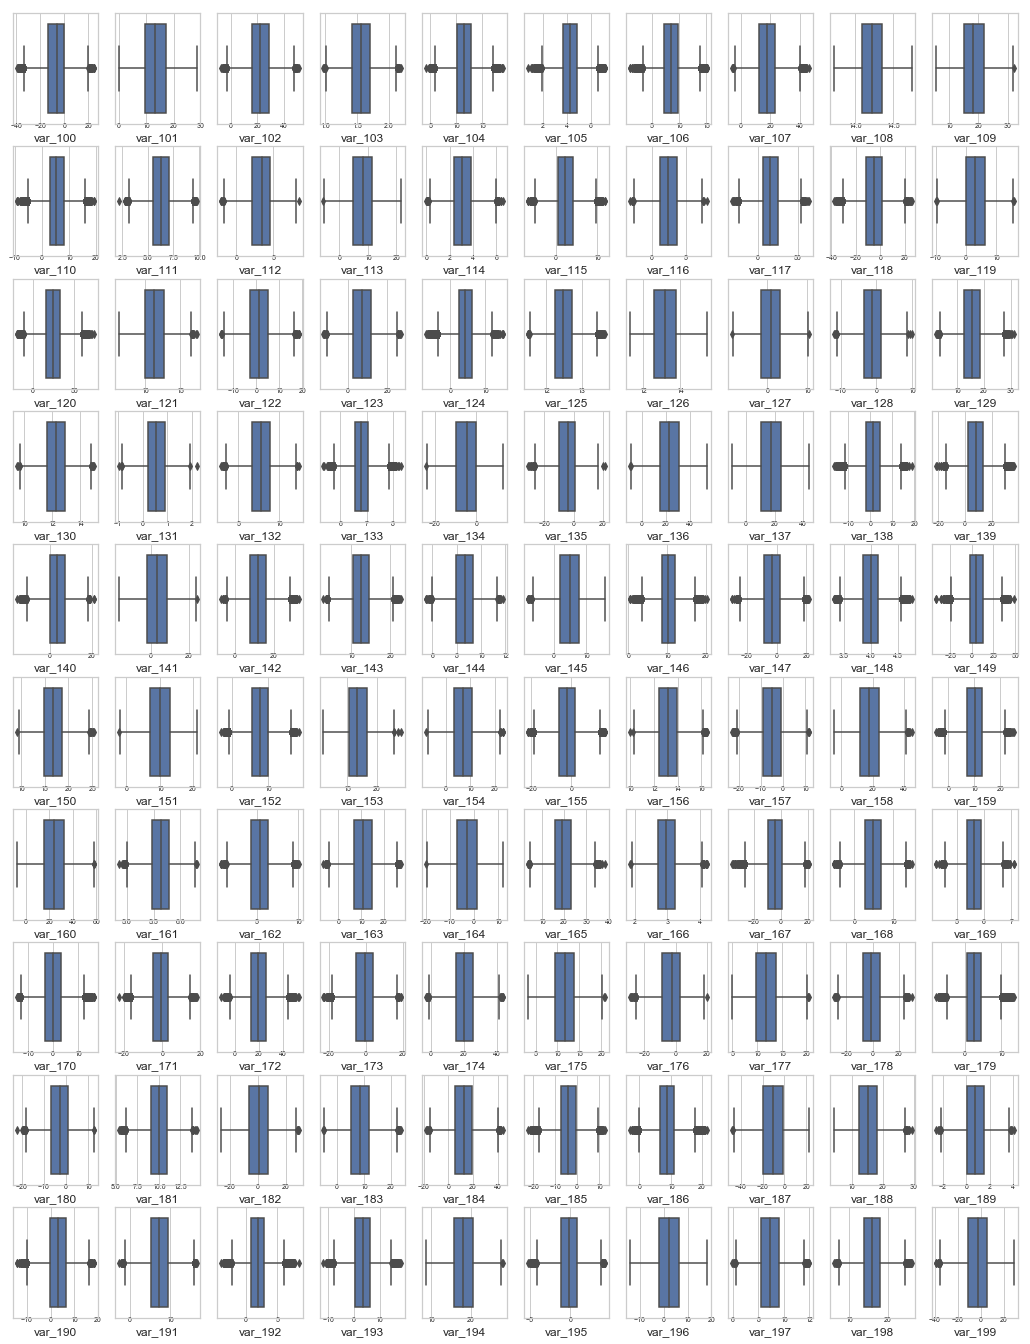

In [359]:
col=customer_data.columns.values[102:]
boxplot_func(customer_data,col)

In [360]:
copy_train_data = customer_data.copy()
copy_test_data = test_data.copy()

In [361]:
def outlier_removal(df):
    for i in columns:
        q75, q25 =np.percentile(df.loc[:,i],[75,25])
        iqr  = q75-q25
        min  = q25 - (iqr*1.5)
        max  = q75 + (iqr*1.5)
        df = df.drop(df[df.loc[:,i]<min].index) 
        df = df.drop(df[df.loc[:,i]>max].index)
        return df

In [362]:
customer_data = outlier_removal(customer_data)
test_data = outlier_removal(test_data)
print("Total number of observations dropped in train set:",copy_train_data.shape[0]-customer_data.shape[0])
print("Total number of observations dropped in test set:",copy_test_data.shape[0]-test_data.shape[0])
customer_data.shape

Total number of observations dropped in train set: 104
Total number of observations dropped in test set: 122


(199896, 202)

In [363]:
customer_data['target'].value_counts()

0    179813
1     20083
Name: target, dtype: int64

## Resampling
Note we are dealing with a data set very unbalanced, where there is only 10% of records categorized with target 1, so those customers who have made a financial transaction. So we will try sampling the data

## 1. Under Sampling

In [365]:
class_0,class_1 = customer_data.target.value_counts()

df_class_0 = customer_data[customer_data['target']==0]
df_class_1 = customer_data[customer_data['target']==1]

under_df_0 = df_class_0.sample(class_1)
df_train_under = pd.concat([under_df_0,df_class_1],axis=0)

print(df_train_under.target.value_counts())
df_train_under.describe()

1    20083
0    20083
Name: target, dtype: int64


,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,40166.000000,40166.000000,40166.000000,40166.000000,40166.000000,40166.000000,40166.000000,40166.000000,40166.000000,40166.000000,...,40166.000000,40166.000000,40166.000000,40166.000000,40166.000000,40166.000000,40166.000000,40166.000000,40166.000000,40166.000000
mean,0.500000,10.893474,-1.364151,10.920430,6.820279,11.107092,-4.748277,5.484426,16.535770,0.368744,...,3.566854,7.621442,1.850713,3.215115,17.904192,-0.085775,2.492664,8.864812,15.642187,-2.931706
std,0.500006,3.148740,4.149990,2.738285,2.054952,1.633523,7.996424,0.894885,3.416298,3.326021,...,4.701121,3.110269,1.487412,4.034226,3.165041,1.458258,5.502420,0.933754,3.130453,10.431301
min,0.000000,2.004400,-14.037000,2.615000,0.374000,5.490200,-28.246100,2.385700,7.302400,-9.839100,...,-12.429100,-2.691700,-3.317700,-11.783400,9.445400,-5.018500,-14.020400,6.047600,6.558700,-38.852800
25%,0.000000,8.547350,-4.555250,8.835900,5.275350,9.893800,-10.946725,4.821425,13.914125,-2.214300,...,0.145950,5.264500,0.796175,0.467550,15.531975,-1.138000,-1.757625,8.216525,13.562575,-10.741125
50%,0.500000,10.731750,-1.338900,10.803450,6.848450,11.134400,-4.527600,5.472900,16.438850,0.471200,...,3.545500,7.550950,1.800900,3.273000,17.871400,-0.119850,2.646000,8.847150,15.711600,-2.392050
75%,1.000000,13.011125,1.669700,12.744500,8.338675,12.298275,1.230825,6.098600,19.074100,3.014250,...,6.840700,9.698600,2.871800,6.129800,20.299475,0.895975,6.735975,9.560500,17.922200,5.252000
max,1.000000,19.210700,10.335600,19.353000,12.706900,16.044800,17.251600,8.355600,27.039800,9.103800,...,17.042900,16.520500,7.647600,17.150400,27.295300,4.088100,18.321500,11.728100,26.034600,27.534000


## 2. Oversampling

In [366]:
over_df = resample(df_class_1, replace=True, n_samples=179813,random_state=123)

df_train_over = pd.concat([over_df,df_class_0],axis=0)

len(df_train_over)
print(df_train_over.target.value_counts())
df_train_over.describe()

1    179813
0    179813
Name: target, dtype: int64


,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,359626.000000,359626.000000,359626.000000,359626.000000,359626.000000,359626.000000,359626.000000,359626.000000,359626.000000,359626.000000,...,359626.000000,359626.000000,359626.000000,359626.000000,359626.000000,359626.000000,359626.000000,359626.000000,359626.000000,359626.000000
mean,0.500000,10.896380,-1.343619,10.914145,6.827702,11.097116,-4.757330,5.486812,16.533336,0.368469,...,3.577988,7.628853,1.842539,3.229898,17.892156,-0.089573,2.478752,8.864021,15.657522,-2.999251
std,0.500001,3.145225,4.139473,2.742305,2.054803,1.636810,7.993323,0.895918,3.416476,3.337735,...,4.690149,3.118225,1.483717,4.032400,3.162298,1.454104,5.501805,0.936533,3.134171,10.450623
min,0.000000,2.004400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.567900,-4.507800,8.824000,5.286400,9.887900,-10.954775,4.817100,13.914825,-2.222375,...,0.166600,5.262100,0.790425,0.472000,15.528625,-1.141700,-1.768075,8.210600,13.565500,-10.828900
50%,0.500000,10.731100,-1.320250,10.790100,6.859200,11.120800,-4.516800,5.476800,16.435800,0.484500,...,3.553000,7.551600,1.794250,3.297000,17.853200,-0.124700,2.599800,8.847400,15.712300,-2.485200
75%,1.000000,13.016450,1.669800,12.744400,8.348675,12.287500,1.217200,6.102600,19.073300,3.020300,...,6.849700,9.730100,2.865200,6.140900,20.311300,0.897000,6.734800,9.562800,17.952825,5.227150
max,1.000000,19.213500,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [367]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train_under = df_train_under[columns]
y_train_under = df_train_under['target']

X_train_over = df_train_over[columns]
y_train_over = df_train_over['target']
print(X_train_under.shape)
train_x,test_x,train_y,test_y = train_test_split(X_train_under,y_train_under,train_size=0.8,random_state=42,stratify=y_train_under)
train_y.shape

(40166, 200)


(32132,)

In [368]:
print(y_train.value_counts())

1    20098
0    20098
Name: target, dtype: int64


## Classification Models

In [369]:
def metrics(y_true,y_pred):
    print("Confusion Matrix")
    print(confusion_matrix(y_true,y_pred))
    
    print("Accuracy:", accuracy_score(y_true,y_pred))
    print("Precision:", precision_score(y_true,y_pred))
    print("F1 Score:", f1_score(y_true,y_pred))
    print("Recall:", recall_score(y_true,y_pred))
    
    false_positive_rate,recall,thresholds = roc_curve(y_true,y_pred)
    roc_auc = auc(false_positive_rate,recall)
    
    print("ROC:",roc_auc)
    
    plt.plot(false_positive_rate,recall,'b')
    plt.plot([0,1],[0,1],'r--')
    plt.title("AUC=%0.2f"%roc_auc)
    plt.show()

## Testing with Undersampling Data

### 1) Logistic Regression

C:\Users\deepasharma\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Metrics:
Confusion Matrix
[[12426  3640]
 [ 3678 12388]]
Accuracy: 0.7722519606622681
Precision: 0.7728974294983778
F1 Score: 0.7719823019879104
Recall: 0.771069338976721
ROC: 0.7722519606622682


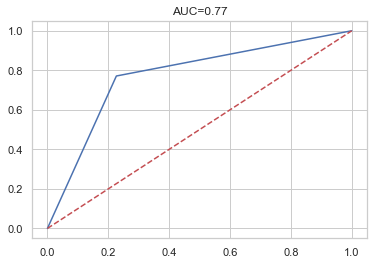

In [370]:
logistic_model = LogisticRegression().fit(train_x,train_y)
logistic_predict = logistic_model.predict(train_x)

print("Metrics:")
metrics(train_y,logistic_predict)

Metrics for test:
Confusion Matrix
[[3090  927]
 [ 958 3059]]
Accuracy: 0.7653721682847896
Precision: 0.7674360260913197
F1 Score: 0.7644633262526552
Recall: 0.76151356733881
ROC: 0.7653721682847895


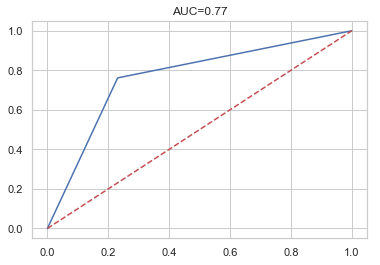

In [371]:
logistic_predict_test = logistic_model.predict(test_x)
print("Metrics for test:")
metrics(test_y,logistic_predict_test)

### 2) Random Forest

Metrics:
Confusion Matrix
[[12896  3170]
 [ 5098 10968]]
Accuracy: 0.7426864185235902
Precision: 0.7757815815532607
F1 Score: 0.7262614223281685
Recall: 0.6826839287937259
ROC: 0.7426864185235902


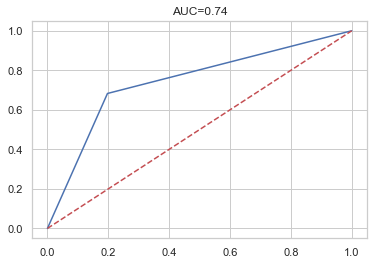

In [372]:
tree = RandomForestClassifier(n_estimators=10,max_depth=7,random_state=1).fit(train_x,train_y)
tree_train_predict = tree.predict(train_x)
    
print("Metrics:")
metrics(train_y,tree_train_predict)

Metrics:
Confusion Matrix
[[2908 1109]
 [1488 2529]]
Accuracy: 0.6767488175255165
Precision: 0.6951621770203409
F1 Score: 0.6607446113651207
Recall: 0.6295743091859597
ROC: 0.6767488175255165


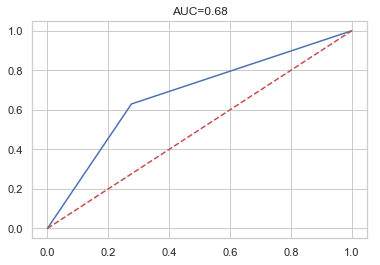

In [373]:
tree_test_predict = tree.predict(test_x)
print("Metrics:")
metrics(test_y,tree_test_predict)

### 3) Naive Bayes

Metrics:
Confusion Matrix
[[13096  2970]
 [ 3124 12942]]
Accuracy: 0.8103448275862069
Precision: 0.8133484162895928
F1 Score: 0.8094314841453499
Recall: 0.8055520975974106
ROC: 0.8103448275862069


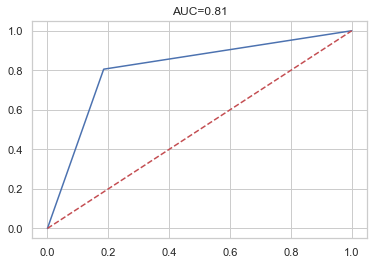

In [374]:
naive = GaussianNB().fit(train_x,train_y)
naive_train_predict = naive.predict(train_x)
print("Metrics:")
metrics(train_y,naive_train_predict)

Metrics:
Confusion Matrix
[[3266  751]
 [ 789 3228]]
Accuracy: 0.8083146626835948
Precision: 0.8112591103292285
F1 Score: 0.8074037018509256
Recall: 0.8035847647498133
ROC: 0.8083146626835948


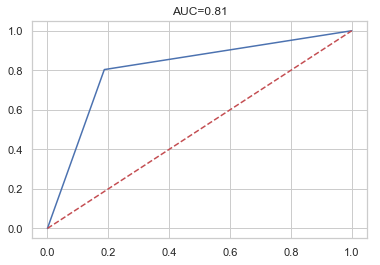

In [375]:
naive_test_predict = naive.predict(test_x)
print("Metrics:")
metrics(test_y,naive_test_predict)

In [411]:
models = []
models.append(("LogisticRegression",LogisticRegression()))
models.append(("Random Forest",RandomForestClassifier(n_estimators=10,max_depth=7,random_state=1)))
models.append(("NaiveBayes",GaussianNB()))



In [410]:
def model_test(x_data,y_data):
    for name,model in models:
        train_x,test_x,train_y,test_y = train_test_split(x_data,y_data,train_size=0.75,random_state=42,stratify=y_data)
        print("#"*10,"Validation for %s "%name,"#"*10)
        model.fit(train_x,train_y)
        metrics(train_y,model.predict(train_x))
        pred = model.predict(test_x)
        print("Testing Metrics of %s"%name)
        metrics(test_y,pred)


## Oversampling Data

############################## Validation for LogisticRegression() model ##############################


C:\Users\deepasharma\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Confusion Matrix
[[104494  30365]
 [ 30872 103988]]
Accuracy: 0.7729600065253097
Precision: 0.7739909045573973
F1 Score: 0.7725332729102978
Recall: 0.7710811211626872
ROC: 0.7729600134914201


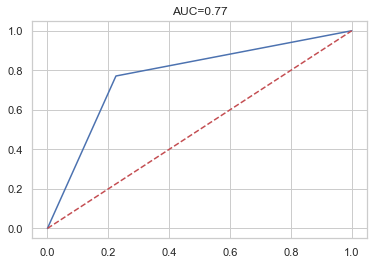

Testing Metrics of LogisticRegression
Confusion Matrix
[[34903 10051]
 [10305 34648]]
Accuracy: 0.7735882634277642
Precision: 0.7751403834537686
F1 Score: 0.7729442734127515
Recall: 0.7707605721531378
ROC: 0.7735882319768226


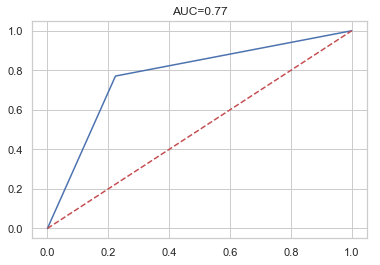

############################## Validation for RandomForestClassifier(max_depth=7, n_estimators=10, random_state=1) model ##############################
Confusion Matrix
[[103320  31539]
 [ 43130  91730]]
Accuracy: 0.723160029512196
Precision: 0.7441449188360415
F1 Score: 0.7107299063646471
Recall: 0.6801868604478719
ROC: 0.723160188838489


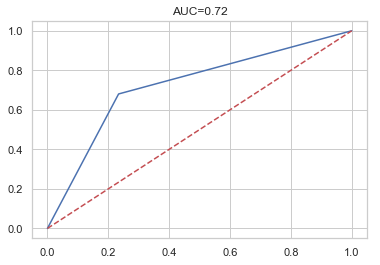

Testing Metrics of Random Forest
Confusion Matrix
[[33864 11090]
 [14578 30375]]
Accuracy: 0.7145049884881044
Precision: 0.7325455203183407
F1 Score: 0.7029785461362217
Recall: 0.6757057371031967
ROC: 0.7145045569441774


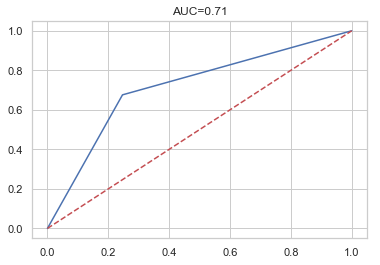

############################## Validation for GaussianNB() model ##############################
Confusion Matrix
[[109723  25136]
 [ 26680 108180]]
Accuracy: 0.8078889510935455
Precision: 0.8114554892135978
F1 Score: 0.8067836047968499
Recall: 0.8021652083642296
ROC: 0.807888972314757


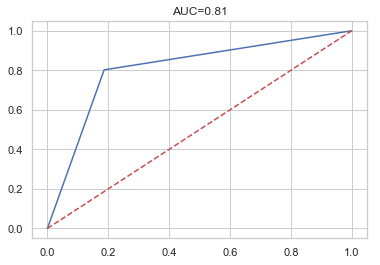

Testing Metrics of NaiveBayes
Confusion Matrix
[[36537  8417]
 [ 8866 36087]]
Accuracy: 0.8077680269611932
Precision: 0.8108709329498472
F1 Score: 0.8068010328984875
Recall: 0.802771783863146
ROC: 0.8077679713905754


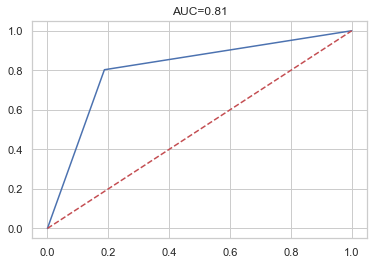

In [409]:
model_test(X_train_over,y_train_over)

## Feature Importance

In [380]:
from sklearn.inspection import permutation_importance

imps = permutation_importance(naive, test_x, test_y)
importances = imps.importances_mean
std = imps.importances_std
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(test_x.shape[1]):
    print("%d. (%f)" % (f + 1, importances[indices[f]]))

Feature ranking:
1. (0.009485)
2. (0.008588)
3. (0.008439)
4. (0.007543)
5. (0.007294)
6. (0.007219)
7. (0.007095)
8. (0.006572)
9. (0.006373)
10. (0.006074)
11. (0.005950)
12. (0.005800)
13. (0.005775)
14. (0.005576)
15. (0.005527)
16. (0.005452)
17. (0.005327)
18. (0.005278)
19. (0.005178)
20. (0.005004)
21. (0.004780)
22. (0.004730)
23. (0.004705)
24. (0.004630)
25. (0.004506)
26. (0.004481)
27. (0.004406)
28. (0.004381)
29. (0.004381)
30. (0.004356)
31. (0.004157)
32. (0.004083)
33. (0.004083)
34. (0.004008)
35. (0.003983)
36. (0.003883)
37. (0.003684)
38. (0.003610)
39. (0.003585)
40. (0.003535)
41. (0.003460)
42. (0.003460)
43. (0.003411)
44. (0.003386)
45. (0.003386)
46. (0.003286)
47. (0.003236)
48. (0.003211)
49. (0.003162)
50. (0.003112)
51. (0.003112)
52. (0.003087)
53. (0.003087)
54. (0.003062)
55. (0.003037)
56. (0.003037)
57. (0.002938)
58. (0.002913)
59. (0.002863)
60. (0.002813)
61. (0.002813)
62. (0.002788)
63. (0.002788)
64. (0.002763)
65. (0.002738)
66. (0.002713)
67

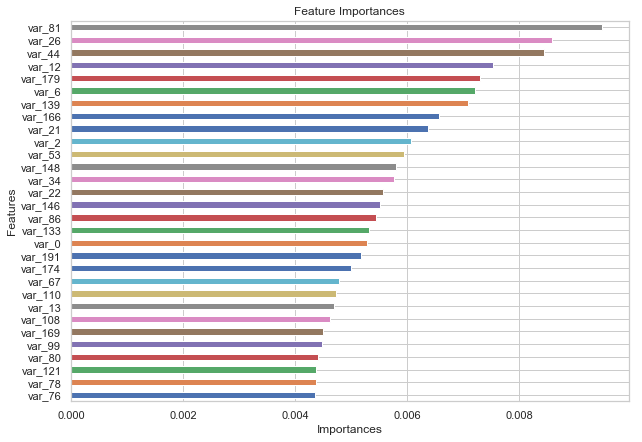

In [381]:
feature = pd.DataFrame({"imp":importances,"col":columns})
feature = feature.sort_values(['imp','col'],ascending=[True,False]).iloc[-30:]
feature.plot(kind='barh',x='col',y='imp',figsize=(10,7),legend=None)
plt.title("Feature Importances")
plt.ylabel("Features")
plt.xlabel("Importances")
plt.show()

In [400]:
test_data.drop(['ID_code'],axis=1,inplace=True)

predict = naive.predict(test_data)


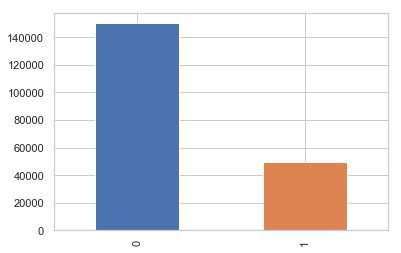

In [402]:
pd.Series(predict).value_counts().plot(kind='bar')